round0: loss is 97.527440392473
round1: loss is 87.51744043237294
round2: loss is 77.50744047227299
round3: loss is 68.0437331689308
round4: loss is 63.45542346490813
round5: loss is 61.55074857886124
round6: loss is 60.729070056601586
round7: loss is 60.526168257452106
round8: loss is 60.70494978534851
round9: loss is 61.105728192234544
round10: loss is 61.60491059169977
round11: loss is 62.12687471637167
round12: loss is 62.61104249858558
round13: loss is 63.01713694592079
round14: loss is 63.33601896181894
round15: loss is 63.52677387120285
round16: loss is 63.592671463327285
round17: loss is 63.5393245828981
round18: loss is 63.38125577031364
round19: loss is 63.13883284755825
round20: loss is 62.83286754955663
round21: loss is 62.499577660014765
round22: loss is 62.148182319246956
round23: loss is 61.79771607517257
round24: loss is 61.466075340659856
round25: loss is 61.165191582417656
round26: loss is 60.90600199480642
round27: loss is 60.68603401065966
round28: loss is 60.529381

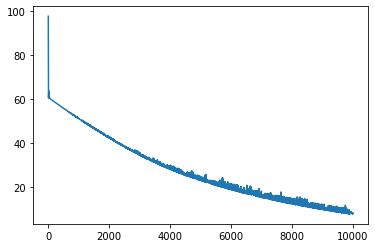

In [1]:
import numpy as np
import torch
from torch import autograd
import matplotlib.pyplot as plt

def f(x):
    return (x-6)**2 + 1

def loss(predictive_value, true_value):
    return torch.mean((predictive_value - true_value) ** 2, dim=0, keepdim=True)

def gradient(W, B, X, Y, loss_function,learning_rate, num_iterations):
    optimizer = torch.optim.Adam([W, B], lr=1e-2)
    loss_monitor = []
    for i in range(num_iterations):
        optimizer.zero_grad()

        Y_pre = torch.matmul(W.T, X) + B
        loss_value = loss_function(Y_pre, Y)
        #grand = autograd.grad(loss_value, [W, B])

        loss_value.backward()
        optimizer.step()

        loss_monitor.append(loss_value)
        print('round{}: loss is {}'.format(i, loss_value))
    
    return [W, B, loss_monitor]

def init_parameter(n_x, n_y):
    return [torch.randn(n_x, n_y, dtype=float, requires_grad=True), torch.randn(n_x, 1, dtype=float, requires_grad=True)]

x = np.arange(-10, 10, 0.1)
y = f(x)
X = torch.tensor(x.reshape(len(x), 1), dtype=float, requires_grad=True)
Y = torch.tensor(y.reshape(len(y), 1), dtype=float, requires_grad=True)
W, B = init_parameter(len(x), 1)

num_iterations = 10000
loss_function = torch.nn.L1Loss()
W, B, loss_monitor = gradient(W, B, X, Y, loss_function, 100, num_iterations)

#print(Y_pre.detach().numpy(), Y.detach().numpy())

plt.plot(range(len(loss_monitor)), loss_monitor)
#print(costs)

#plt.plot(range(num_iterations), costs)
plt.show()
